In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from network import Network
import torch


In [2]:
# Import Dataset
qcd_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/qcd_outputDataForLearning.csv')
hh_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/dihiggs_outputDataForLearning.csv')

qcd_raw.head()
print(len(qcd_raw), "rows of qcd data")
hh_raw.head()
print(len(hh_raw), "rows of dihiggs data")

# Make higgs and qcd sets from raw data
# hh_all = hh_raw[['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]
# qcd = qcd_raw[['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]
# hh_all = hh_raw[['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'deltaPhi(h1, h2)', 'deltaPhi(h1 jets)', 'deltaPhi(h2 jets)']]
# qcd = qcd_raw[['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'deltaPhi(h1, h2)', 'deltaPhi(h1 jets)', 'deltaPhi(h2 jets)']]
# hh_all = hh_raw[['hh_mass', 'h1_mass', 'h2_mass']]
# qcd = qcd_raw[['hh_mass', 'h1_mass', 'h2_mass']]
# hh_all = hh_raw[['deltaR(h1 jets)', 'deltaR(h2 jets)']]
# qcd = qcd_raw[['deltaR(h1 jets)', 'deltaR(h2 jets)']]


hh_all = hh_raw[['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1, h2)', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'deltaPhi(h1, h2)', 'deltaPhi(h1 jets)', 'deltaPhi(h2 jets)']]
qcd = qcd_raw[['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1, h2)', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'deltaPhi(h1, h2)', 'deltaPhi(h1 jets)', 'deltaPhi(h2 jets)']]

n_factors = np.shape(hh_all)[1]
print(n_factors)

# change this for testing w dummy variables
# n_factors = 2
# n_factors +=1
# print(n_factors)

1703 rows of qcd data
4605 rows of dihiggs data
9


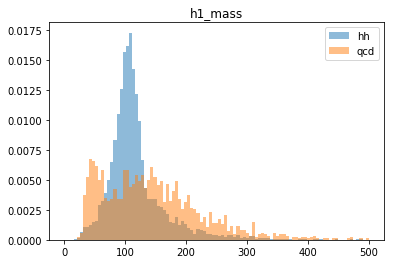

In [3]:
plt.hist(hh_raw['h1_mass'], label="hh", density=1, alpha=.5, bins=np.linspace(0, 500, 100))
plt.hist(qcd_raw['h1_mass'], label="qcd", density=1, alpha=.5, bins=np.linspace(0, 500, 100))
plt.title("h1_mass")
plt.legend()
plt.show()

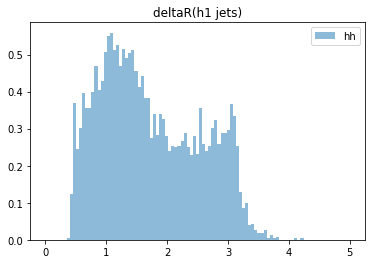

In [4]:
plt.hist(hh_raw['deltaR(h1 jets)'], label="hh", density=1, alpha=.5, bins=np.linspace(0, 5, 100))
# plt.hist(qcd_raw['deltaR(h1 jets)'], label="qcd", density=1, alpha=.5, bins=np.linspace(0, 5, 100))
plt.title("deltaR(h1 jets)")
plt.legend()
plt.show()

In [5]:
hh_all = np.array(hh_all)
qcd = np.array(qcd)

# add labels to di-higgs
hh_all=hh_all[:,:n_factors]
# # print(hh[0:3])
hh_labels= np.zeros((len(hh_all),1))
hh_labels = hh_labels+1
#a = hh[:len(hh)]
# print(a.shape)
# hh_all[:,0] = np.random.rand(np.shape(hh_all)[0])
hh_all = np.append(hh_all, hh_labels, axis=1)
# hh_all = np.append(hh_all, 1-hh_labels, axis=1)## hh qcd labels 


# print(hh.shape)
# print(hh[0:3])

# add labels to qcd
qcd=qcd[:,:n_factors]
# print(hh[0:3])
qcd_labels= np.zeros((len(qcd),1))
#a = hh[:len(hh)]
# print(a.shape)
# qcd hh labels 
# qcd[:, 0] = -1 * np.random.rand(np.shape(qcd)[0])
qcd = np.append(qcd, qcd_labels, axis=1) 
# qcd = np.append(qcd, 1-qcd_labels, axis=1)# qcd qcd labels


# use this for dummy variables
# hh_all[:,0] = np.random.rand(np.shape(hh_all)[0])
# hh_all[:,1] = np.random.rand(np.shape(hh_all)[0])
# qcd[:, 0] = -1 * np.random.rand(np.shape(qcd)[0])
# qcd[:, 1] = -1 * np.random.rand(np.shape(qcd)[0])

# 

# print(hh.shape)
# print(hh[0:3])
# print(qcd[:4])

# select a quarter of hh events so that the set is half and half
# we shuffle the list first to take a random 1/4. this means we have a different dataset every time
# np.random.seed(0)
# np.random.shuffle(hh_all) 
hh = hh_all[0:len(qcd)]
# print(hh[:4])
# print(qcd[:4])

all_data = np.append(hh,qcd, axis=0) 
all_data[:n_factors,:]

np.random.seed(0)
for i in range (4): # shuffle 4 times
    np.random.shuffle(all_data) 
print(all_data[:4])
all_labels = all_data[:,n_factors:]
# for testing model resilience
# for i in range(2):
#     np.random.shuffle(all_labels)
all_data = all_data[:,:n_factors]
# print(all_data[:4])
print(all_labels[:4])
# print(test_data)
# print(len(all_data))
# print(all_labels)

[[ 3.59871965e+02  9.95274650e+01  1.23727135e+02  3.76338688e+00
   1.83328407e+00  2.89078642e+00 -2.64904100e+00  1.81844530e+00
  -1.59140021e+00  1.00000000e+00]
 [ 3.77248615e+02  1.84710247e+02  7.76233425e+01  3.03919543e+00
   2.84355966e+00  1.90858838e+00  2.45651907e+00 -2.15697601e+00
   1.66526687e+00  0.00000000e+00]
 [ 9.83485927e+01  3.04781249e+01  1.78390904e+01  1.33803826e+00
   6.92389046e-01  5.39485992e-01 -1.32802245e+00 -1.91958323e-01
  -3.29304457e-01  1.00000000e+00]
 [ 5.42543199e+02  1.17018061e+02  9.01747176e+01  4.84242431e+00
   2.65217628e+00  2.29208081e+00 -2.58612612e+00 -2.58378720e+00
   2.08678812e+00  1.00000000e+00]]
[[1.]
 [0.]
 [1.]
 [1.]]


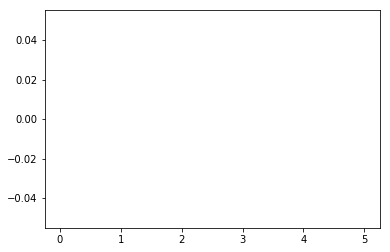

[[ 0.16406217  0.13777842  0.206275    0.48444846  0.33357623  0.57712665
  -0.84339429  0.57886037 -0.5065633 ]
 [ 0.17198402  0.25569913  0.12941183  0.39122567  0.51740149  0.38103722
   0.7820997  -0.68662386  0.53007602]
 [ 0.04483618  0.04219165  0.02974092  0.17224128  0.12598404  0.10770486
  -0.42281209 -0.06110553 -0.10482187]
 [ 0.24734024  0.1619911   0.15033719  0.62334941  0.48257822  0.45759898
  -0.82336363 -0.82248941  0.66425169]]


In [6]:
plt.hist(all_data[:,0], alpha=.25, bins=np.linspace(0, 5, 100))
plt.show()

# scale the data by dividing it by the max value of each
for i in range(np.shape(all_data)[1]):
    all_data[:,i] = np.true_divide(all_data[:,i], np.max(all_data[:,i]))
print(all_data[:4])

# plt.hist(all_data[:,0], alpha=.25, bins=np.linspace(0, 5, 100))
# plt.show()

In [7]:
# TODO: Train-Test split
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, train_size=0.3, test_size=0.5, random_state=42)
# print(len(train_data))
# print(train_data)
# print(train_data.shape)
# print(train_labels)
train_data = torch.from_numpy(train_data)
# train_data = torch.zeros(len(train_labels), 4)
test_data = torch.from_numpy(test_data)
# test_data = torch.zeros(len(test_labels), 4)
train_labels = torch.from_numpy(train_labels)
test_labels = torch.from_numpy(test_labels)

print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)




torch.Size([1021, 9])
torch.Size([1703, 9])
torch.Size([1021, 1])
torch.Size([1703, 1])


In [8]:
learnRate = 0.01
np.random.seed(234)
node_list = [n_factors, 10, 10, 1]
old_model = Network(node_list)
model = Network(node_list, old_model.w_initial, old_model.b_initial)
model.train(train_data, train_labels, 2401, learnRate, 0, True, test_data, test_labels)

train accuracy at epoch 0 is: 49.75514201762977
test accuracy is: 49.67704051673517
train accuracy at epoch 300 is: 57.78648383937317
test accuracy is: 57.25190839694656
train accuracy at epoch 600 is: 59.54946131243879
test accuracy is: 56.429829712272465
train accuracy at epoch 900 is: 59.353574926542606
test accuracy is: 57.13446858485026
train accuracy at epoch 1200 is: 60.430950048971596
test accuracy is: 57.36934820904287
train accuracy at epoch 1500 is: 60.62683643486777
test accuracy is: 57.36934820904287
train accuracy at epoch 1800 is: 60.920666013712044
test accuracy is: 57.95654726952437
train accuracy at epoch 2100 is: 61.116552399608224
test accuracy is: 57.78038755137992
train accuracy at epoch 2400 is: 61.900097943192954
test accuracy is: 57.95654726952437


In [9]:
# testout = model.get_output().numpy()
# testout[testout>.5] = 1
# testout[test out<=.5] = 0
# print("train", np.sum(train_labels.numpy()))
# print("test", np.sum(test_labels.numpy()))
# print("out", np.sum(testout))
# print("train acc", (1-(np.sum(np.abs(train_labels.numpy()-testout))/len(train_labels.numpy())))
#      )
# print("test acc", (1-(np.sum(np.abs(test_labels.numpy()-testout))/len(test_labels.numpy())))
#      )


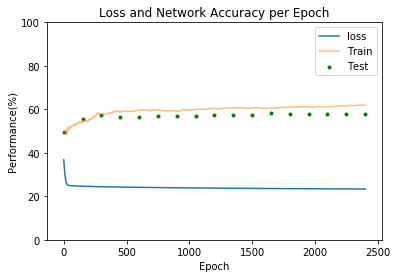

In [10]:
# print(model.losses)
plt.plot(model.losses, label="loss")
plt.plot(model.train_accuracies, label="Train", alpha=0.5)
plt.scatter(model.test_num, model.test_accuracies, label="Test", marker=".", color="green")
plt.xlabel("Epoch")
plt.ylabel("Performance(%)")
plt.title("Loss and Network Accuracy per Epoch")
plt.legend()
plt.ylim(0,100)
plt.show()

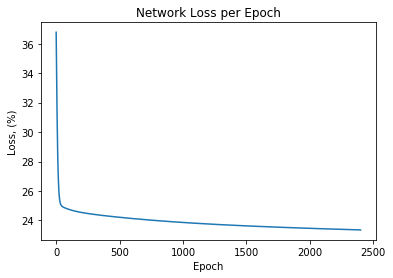

In [11]:
plt.plot(model.losses)
plt.title("Network Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss, (%)")
plt.show()

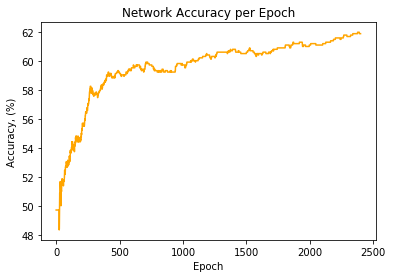

In [12]:
plt.plot(model.train_accuracies, label="Train", color="orange")
plt.title("Network Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy, (%)")
plt.show()

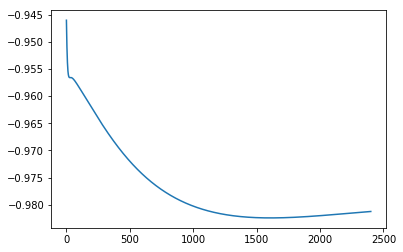

In [13]:
plt.plot(model.weight_change)

In [14]:
# print(len(model.weights))
# print(model.weights)

In [15]:
# print(model.biases)

In [16]:
print(model.layers)

[tensor([[9.4479e-01, 4.8840e-01, 4.8307e-01,  ..., 9.1901e-01, 1.8400e-01,
         7.6992e-01],
        [9.6374e-01, 2.6613e-01, 4.1790e-01,  ..., 9.5782e-01, 3.3889e-01,
         8.1505e-01],
        [9.3595e-01, 6.8972e-01, 8.5957e-01,  ..., 4.0700e-01, 7.0189e-04,
         4.1389e-01],
        ...,
        [9.5313e-01, 3.7560e-01, 5.1991e-01,  ..., 9.1221e-01, 1.2031e-01,
         8.7092e-01],
        [9.2155e-01, 5.3156e-02, 8.6659e-01,  ..., 9.7504e-01, 7.5402e-01,
         6.3818e-01],
        [9.2480e-01, 1.4846e-01, 8.7629e-01,  ..., 9.4872e-01, 7.8493e-01,
         8.1642e-01]]), tensor([[0.6203, 0.4871, 0.9465,  ..., 0.2115, 0.4280, 0.1687],
        [0.5810, 0.4040, 0.9488,  ..., 0.1901, 0.4465, 0.2182],
        [0.6249, 0.6620, 0.9079,  ..., 0.4508, 0.4390, 0.1781],
        ...,
        [0.6519, 0.4480, 0.9486,  ..., 0.2684, 0.4017, 0.2345],
        [0.6557, 0.5798, 0.8964,  ..., 0.5482, 0.3122, 0.2079],
        [0.6047, 0.6149, 0.9017,  ..., 0.4919, 0.2872, 0.1456]]), ten

In [17]:
# out_labels = model.get_output()
# a = out_labels[:,0]
# # b = out_labels[:,1]
# c = (a+b)
# print(c)
# print(0.7336+0.1798)
# print(c.shape)

In [18]:
print(model.weights)

[tensor([[-0.9812, -1.7795,  1.8011, -2.6496, -1.3348,  0.2383, -0.7175, -0.5074,
         -0.9752,  1.0580],
        [ 0.0059, -1.6222, -1.2841, -1.7385, -2.0238,  0.1783, -0.1273, -1.0423,
         -0.4526,  1.1495],
        [-0.2028, -0.7130, -0.7375, -1.6042, -1.6363, -0.5073,  1.1631, -0.4194,
         -2.4313,  1.2671],
        [ 1.4844, -2.3551,  0.1780, -3.0544, -0.4514,  3.1354, -0.1938,  2.1798,
         -1.9820,  0.2544],
        [ 1.3656, -2.2287, -0.2918, -2.8468,  0.0261,  2.5903, -0.3937,  1.5005,
         -2.9140, -0.9873],
        [ 1.6599, -0.1298, -0.7704, -1.3597, -1.1628,  0.5424,  0.8424,  0.1902,
         -0.9957, -1.3164],
        [-0.8016,  0.4992,  1.4358,  0.5182, -0.4307,  0.4483, -1.8427, -0.9947,
         -0.3701, -0.5937],
        [-0.4300, -1.6052, -0.4772, -0.3806,  0.5354,  0.7376, -0.6333,  1.6585,
          2.3753, -1.0807],
        [ 0.5914, -0.7164,  0.2404,  0.1623,  0.2835, -1.0467,  0.0542,  0.6692,
          2.1667,  1.9313]]), tensor([[ 0.9259

In [19]:
print(1-sum(train_labels)/len(train_labels))

tensor([0.4976], dtype=torch.float64)


In [20]:
print(train_data)

tensor([[ 0.1396,  0.0528,  0.1558,  ..., -0.8773, -0.1657, -0.4379],
        [ 0.1912,  0.0902,  0.2237,  ..., -0.9146,  0.0933, -0.1137],
        [ 0.1706,  0.2577,  0.3008,  ...,  0.7491, -0.9550, -0.9351],
        ...,
        [ 0.1982,  0.1504,  0.1658,  ..., -0.8648, -0.3386, -0.2507],
        [ 0.1399,  0.1969,  0.1645,  ...,  0.9583,  0.8981,  0.6306],
        [ 0.1281,  0.1267,  0.1964,  ...,  0.8097,  0.5174,  0.7946]],
       dtype=torch.float64)


In [21]:
print(model.biases)

[tensor([[1.3431, 1.3431, 1.3431, 1.3431, 1.3431, 1.3431, 1.3431, 1.3431, 1.3431,
         1.3431]]), tensor([[-0.4454, -0.4454, -0.4454, -0.4454, -0.4454, -0.4454, -0.4454, -0.4454,
         -0.4454, -0.4454]]), tensor([[0.1743]])]


In [22]:

pred = model.pred(test_data)[-1].numpy()
actual = test_labels.numpy()
print(pred)
pred[pred>.5] = 1
pred[pred<.51] = 0
print(pred)

print(sum(train_labels)/len(train_labels))
print(sum(test_labels)/len(train_labels))

print("ASDF", sum(pred)/len(pred))

[[0.59088904]
 [0.5731504 ]
 [0.34491187]
 ...
 [0.6298079 ]
 [0.48957083]
 [0.57034177]]
[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]
tensor([0.5024], dtype=torch.float64)
tensor([0.8394], dtype=torch.float64)
ASDF [0.4903112]
